In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
dataframe = pd.read_csv('hr-employee-attrition-with-null.csv')

In [21]:
dataframe.describe()

,Unnamed: 0,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1176.000000,1176.000000,1176.00000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,734.500000,37.134354,798.875850,9.37500,2.920918,1.0,1031.399660,2.733844,65.821429,2.728741,...,2.694728,80.0,0.752551,11.295068,2.787415,2.770408,7.067177,4.290816,2.159014,4.096939
std,424.496761,9.190317,406.957684,8.23049,1.028796,0.0,601.188955,1.092992,20.317323,0.705280,...,1.093660,0.0,0.822550,7.783376,1.290507,0.705004,6.127836,3.630901,3.163524,3.537393
min,0.000000,18.000000,102.000000,1.00000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,367.250000,30.000000,457.750000,2.00000,2.000000,1.0,494.750000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,734.500000,36.000000,798.500000,7.00000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1101.750000,43.000000,1168.250000,15.00000,4.000000,1.0,1562.250000,4.000000,84.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.250000,7.000000
max,1469.000000,60.000000,1499.000000,29.00000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [22]:
dataframe.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41.0,Yes,Travel_Rarely,NaN,NaN,1.0,NaN,Life Sciences,1.0,...,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,1,NaN,No,NaN,279.0,Research & Development,NaN,NaN,Life Sciences,1.0,...,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,2,37.0,Yes,NaN,1373.0,NaN,2.0,2.0,NaN,1.0,...,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,3,NaN,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,NaN,...,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,...,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


In [23]:
dataframe.loc[dataframe['Attrition'] == 'No', 'Attrition'] = 0.0
dataframe.loc[dataframe['Attrition'] == 'Yes', 'Attrition'] = 1.0
for col in dataframe:
    if not np.issubdtype(dataframe[col], np.number):
        dataframe[col] = pd.Categorical(dataframe[col]).codes

In [24]:
dataframe.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41.0,1,2,NaN,-1,1.0,NaN,1,1.0,...,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,1,NaN,0,-1,279.0,1,NaN,NaN,1,1.0,...,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,2,37.0,1,-1,1373.0,-1,2.0,2.0,-1,1.0,...,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,3,NaN,0,1,1392.0,1,3.0,4.0,1,NaN,...,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,4,27.0,0,2,591.0,1,2.0,1.0,3,1.0,...,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


In [25]:
dataframe.describe()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1176.000000,1470.000000,1470.000000,1176.000000,1470.000000,1176.00000,1176.000000,1470.000000,1176.0,...,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,734.500000,37.134354,0.161224,1.089116,798.875850,0.800680,9.37500,2.920918,1.608844,1.0,...,2.694728,80.0,0.752551,11.295068,2.787415,2.770408,7.067177,4.290816,2.159014,4.096939
std,424.496761,9.190317,0.367863,1.200557,406.957684,1.016742,8.23049,1.028796,1.772662,0.0,...,1.093660,0.0,0.822550,7.783376,1.290507,0.705004,6.127836,3.630901,3.163524,3.537393
min,0.000000,18.000000,0.000000,-1.000000,102.000000,-1.000000,1.00000,1.000000,-1.000000,1.0,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,367.250000,30.000000,0.000000,0.000000,457.750000,1.000000,2.00000,2.000000,1.000000,1.0,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,734.500000,36.000000,0.000000,2.000000,798.500000,1.000000,7.00000,3.000000,1.000000,1.0,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1101.750000,43.000000,0.000000,2.000000,1168.250000,1.000000,15.00000,4.000000,3.000000,1.0,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.250000,7.000000
max,1469.000000,60.000000,1.000000,2.000000,1499.000000,2.000000,29.00000,5.000000,5.000000,1.0,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [26]:
suffled = dataframe.sample(frac=1)
attrition_yes = suffled[suffled['Attrition'] == 1.0]
attrition_no = suffled[suffled['Attrition'] == 0.0]

In [27]:
sep_yes = int(np.floor(len(attrition_yes.index) * 0.9))
sep_no = int(np.floor(len(attrition_no.index) * 0.9))
train = pd.concat([attrition_yes.iloc[:sep_yes], attrition_no.iloc[:sep_no]])
test = pd.concat([attrition_yes.iloc[sep_yes:], attrition_no.iloc[sep_no:]])
train = train.sample(frac=1)
test = test.sample(frac=1)

In [28]:
train.describe()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1322.000000,1067.000000,1322.00000,1322.000000,1061.000000,1322.000000,1054.000000,1063.000000,1322.000000,1056.0,...,1057.000000,1058.0,1061.000000,1051.000000,1058.000000,1056.000000,1061.000000,1057.000000,1069.000000,1055.000000
mean,730.895613,36.989691,0.16112,1.099849,803.350613,0.804085,9.325427,2.920038,1.600605,1.0,...,2.694418,80.0,0.737041,11.265461,2.782609,2.779356,7.076343,4.275307,2.154350,4.112796
std,422.803596,9.176755,0.36778,1.195126,406.128142,1.012510,8.264122,1.027954,1.772684,0.0,...,1.101092,0.0,0.812424,7.851535,1.296965,0.707167,6.184492,3.578249,3.167534,3.522169
min,0.000000,18.000000,0.00000,-1.000000,103.000000,-1.000000,1.000000,1.000000,-1.000000,1.0,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.00000,0.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,728.500000,36.000000,0.00000,2.000000,799.000000,1.000000,7.000000,3.000000,1.000000,1.0,...,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1096.750000,43.000000,0.00000,2.000000,1169.000000,1.000000,14.000000,4.000000,3.000000,1.0,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,1469.000000,60.000000,1.00000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [29]:
test.describe()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,148.000000,109.000000,148.000000,148.000000,115.000000,148.000000,122.000000,113.000000,148.000000,120.0,...,119.000000,118.0,115.000000,125.000000,118.000000,120.000000,115.000000,119.000000,107.000000,121.000000
mean,766.695946,38.550459,0.162162,0.993243,757.591304,0.770270,9.803279,2.929204,1.682432,1.0,...,2.697479,80.0,0.895652,11.544000,2.830508,2.691667,6.982609,4.428571,2.205607,3.958678
std,439.493937,9.245105,0.369851,1.248109,414.044872,1.056851,7.954041,1.041263,1.776786,0.0,...,1.029683,0.0,0.901985,7.209429,1.235550,0.683489,5.602291,4.082977,3.137534,3.679666
min,6.000000,20.000000,0.000000,-1.000000,102.000000,-1.000000,1.000000,1.000000,-1.000000,1.0,...,1.000000,80.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,365.000000,31.000000,0.000000,0.000000,390.500000,0.750000,3.000000,2.000000,1.000000,1.0,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,814.000000,37.000000,0.000000,2.000000,754.000000,1.000000,7.000000,3.000000,1.000000,1.0,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,2.000000
75%,1130.250000,45.000000,0.000000,2.000000,1162.000000,1.000000,16.000000,4.000000,3.000000,1.0,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.500000,7.000000
max,1466.000000,59.000000,1.000000,2.000000,1476.000000,2.000000,29.000000,5.000000,5.000000,1.0,...,4.000000,80.0,3.000000,33.000000,6.000000,4.000000,24.000000,17.000000,15.000000,17.000000


In [38]:
def plot_histogram(df: pd.DataFrame, col: str, bin_size: int):
    # remove NaN values
    df_col_no_nan = df[~np.isnan(df[col])][col]
    # hist is the count for each bin
    # bin_edge is the edge values of the bins
    hist, bin_edge = np.histogram(df_col_no_nan, bin_size)
    # plot the histogram
    plt.fill_between(bin_edge.repeat(2)[1:-1],hist.repeat(2),facecolor='steelblue')
    plt.show()

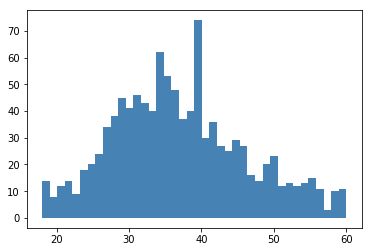

In [39]:
plot_histogram(train, 'Age', bin_size=40)

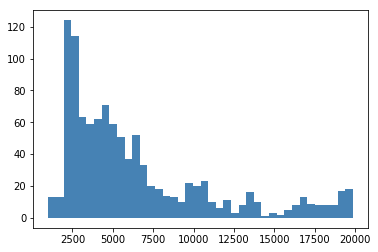

In [40]:
plot_histogram(train, 'MonthlyIncome', bin_size=40)

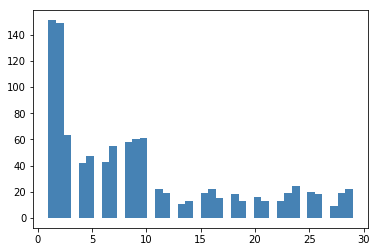

In [41]:
plot_histogram(train, 'DistanceFromHome', bin_size=40)

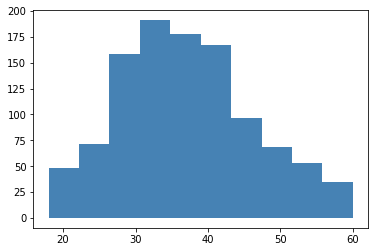

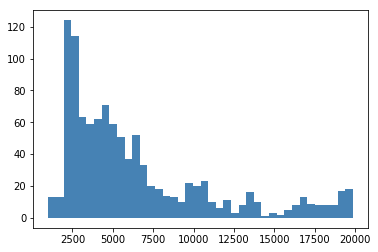

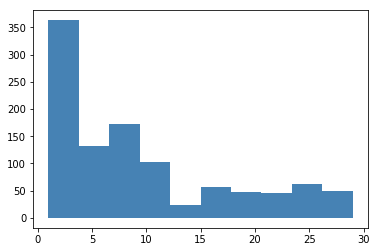

In [56]:
plot_histogram(train, 'Age', bin_size=10)
plot_histogram(train, 'MonthlyIncome', bin_size=40)
plot_histogram(train, 'DistanceFromHome', bin_size=10)